In [10]:
from glob import glob
from os.path import join
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

# Load the reference images
These are collected using a uniform fluorescent signal, such as from a dye. An example protocol can be found here: https://calm.ucsf.edu/how-acquire-flat-field-correction-images

In [21]:
tritc_ref = np.load('refs/tritc.npy')
fitc_ref = np.load('refs/fitc.npy')
dark_ref = np.load('refs/dark.npy')

# Load example images to be corrected

In [8]:
# Load images to be corrected
tritc_img = imread('tritc.tif')
fitc_img = imread('fitc.tif')

/var/folders/2j/x9t3x68j27v37txf6kq8096h0000gn/T/ipykernel_15385/2994124816.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tritc_img = imread('tritc.tif')
/var/folders/2j/x9t3x68j27v37txf6kq8096h0000gn/T/ipykernel_15385/2994124816.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fitc_img = imread('fitc.tif')


# Correct the TRITC image

83 9850


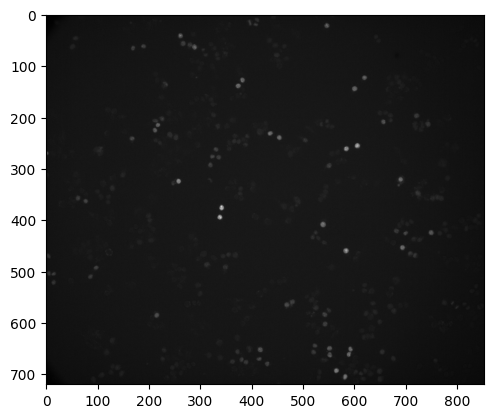

In [24]:
# Display image
plt.imshow(tritc_img, cmap='gray')

In [22]:
# Correct for illumination bias using references
tritc_corr = tritc_img.astype(float) - dark_ref
tritc_corr = tritc_img.mean() * tritc_corr / tritc_ref
# Reset pixels that fall outside of the range
tritc_corr[tritc_corr < 0] = 0
tritc_corr[tritc_corr > 65535] = 65535

0.0 65535.0


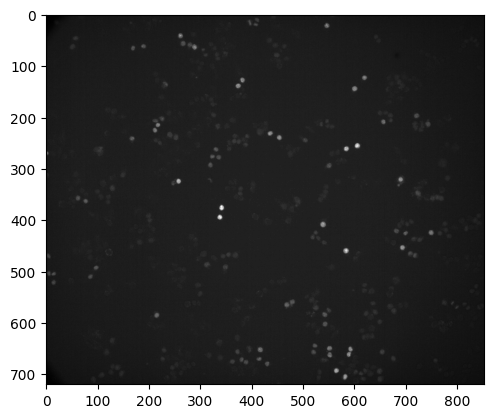

In [25]:
# Display corrected image
plt.imshow(tritc_corr, cmap='gray')

# Correct the FITC image

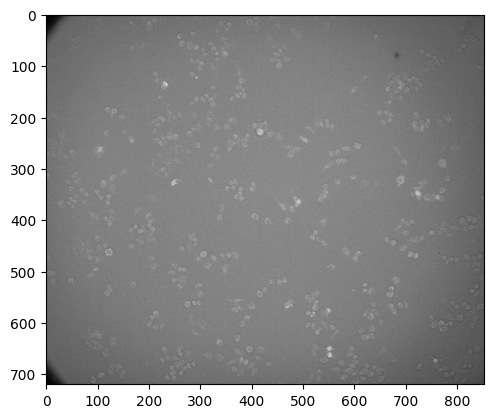

In [26]:
# Display image
plt.imshow(fitc_img, cmap='gray')

In [27]:
# Correct for illumination bias using references
fitc_corr = fitc_img.astype(float) - dark_ref
fitc_corr = fitc_img.mean() * fitc_corr / fitc_ref
# Reset pixels that fall outside of the range
fitc_corr[fitc_corr < 0] = 0
fitc_corr[fitc_corr > 65535] = 65535

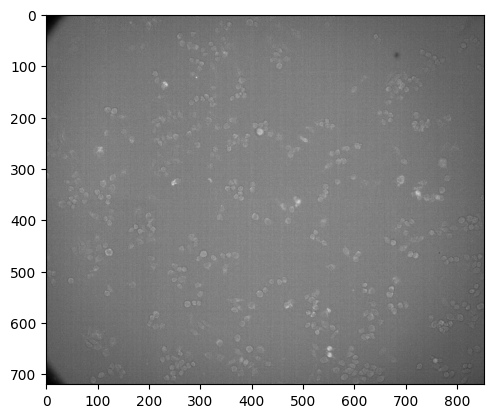

In [28]:
# Display corrected image
plt.imshow(fitc_corr, cmap='gray')